## Imports

In [1]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sympy import *
from skimage import data, io, filters
from numpy import linspace
from numpy.core.umath import pi
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
from emoji_extractor.extract import Extractor
from emojipedia import Emojipedia
from skimage import io
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics.pairwise import chi2_kernel
#from utils.plotter import plot_SVM_DecisionBoundary
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss, f1_score
from pandas.api.types import CategoricalDtype
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

## Load csvs

In [2]:
path_counts_ran = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/random_per_user_emoji_counts.csv'
path_users_ran = '/home/stelios/Desktop/Honours Project/Samples/user_data/ran.csv'
counts_df_ran = pd.read_csv(path_counts_ran,index_col=None, header=0, low_memory = False)
users_df_ran = pd.read_csv(path_users_ran,index_col=None, header=0, low_memory = False)

path_counts_lon = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/london_per_user_emoji_counts.csv'
path_users_lon = '/home/stelios/Desktop/Honours Project/Samples/user_data/lon.csv'
counts_df_lon = pd.read_csv(path_counts_lon,index_col=None, header=0, low_memory = False)
users_df_lon = pd.read_csv(path_users_lon,index_col=None, header=0, low_memory = False)

path_counts_joh = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/joh_per_user_emoji_counts.csv'
path_users_joh = '/home/stelios/Desktop/Honours Project/Samples/user_data/joh.csv'
counts_df_joh = pd.read_csv(path_counts_joh,index_col=None, header=0, low_memory = False)
users_df_joh = pd.read_csv(path_users_joh,index_col=None, header=0, low_memory = False)

path_counts_nyc = '/home/stelios/Desktop/Honours Project/Samples/per_user_emoji_counts/nyc_per_user_emoji_counts.csv'
path_users_nyc = '/home/stelios/Desktop/Honours Project/Samples/user_data/nyc.csv'
counts_df_nyc = pd.read_csv(path_counts_nyc,index_col=None, header=0, low_memory = False)
users_df_nyc = pd.read_csv(path_users_nyc,index_col=None, header=0, low_memory = False)

In [3]:
# Append counts from all Locations
counts = counts_df_ran.append(counts_df_lon, sort=False,ignore_index=True).append(counts_df_joh, sort=False,ignore_index=True).append(counts_df_nyc, sort=False,ignore_index=True)
print(counts.shape)

# Append users from all Locations
users = users_df_ran.append(users_df_lon, sort=False,ignore_index=True).append(users_df_joh, sort=False,ignore_index=True).append(users_df_nyc, sort=False,ignore_index=True)
print(users.shape)

# Fill NaN with 0.0
counts = counts.fillna(0.0)

(40000, 2579)
(40000, 28)


In [4]:
# Preview counts
counts.describe()

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,🧗🏻‍♂️,👩🏾‍🚒,👩🏿‍🎨,👨🏿‍✈️,👰🏿,⛹🏿‍♂️,🤹🏽‍♂️,🧜🏿‍♂️,🇵🇲,🇬🇺
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.0000,40000.0000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0000,40000.0000,40000.000000,40000.000000,40000.00000
mean,0.000025,0.000050,0.000225,0.000300,0.000225,0.000075,0.00020,0.0001,0.0001,0.000050,...,0.000050,0.000075,0.000100,0.000100,0.000125,0.0002,0.0002,0.000225,0.000075,0.00005
std,0.005000,0.007071,0.035707,0.031622,0.022912,0.011180,0.01581,0.0100,0.0100,0.007071,...,0.007071,0.015000,0.015811,0.015811,0.018028,0.0400,0.0400,0.045000,0.015000,0.01000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.00000
max,1.000000,1.000000,7.000000,5.000000,3.000000,2.000000,2.00000,1.0000,1.0000,1.000000,...,1.000000,3.000000,3.000000,3.000000,3.000000,8.0000,8.0000,9.000000,3.000000,2.00000


## % Feuture representation

In [5]:
# Feature % representation
for index, row in counts.iterrows():
    counts.loc[index] = counts.loc[index]/counts.loc[index].sum()
counts.describe()

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,🧗🏻‍♂️,👩🏾‍🚒,👩🏿‍🎨,👨🏿‍✈️,👰🏿,⛹🏿‍♂️,🤹🏽‍♂️,🧜🏿‍♂️,🇵🇲,🇬🇺
count,2.722600e+04,2.722600e+04,27226.000000,27226.000000,2.722600e+04,2.722600e+04,2.722600e+04,2.722600e+04,27226.000000,2.722600e+04,...,2.722600e+04,2.722600e+04,27226.000000,2.722600e+04,27226.000000,27226.000000,2.722600e+04,27226.000000,2.722600e+04,2.722600e+04
mean,2.836262e-08,1.853382e-07,0.000004,0.000001,4.870087e-07,1.662974e-07,3.372688e-07,6.847104e-07,0.000001,4.770146e-07,...,3.034764e-07,2.123098e-07,0.000001,7.417875e-07,0.000004,0.000007,4.848792e-07,0.000001,7.395221e-07,1.958912e-07
std,4.679919e-06,2.930671e-05,0.000589,0.000101,3.824005e-05,1.959546e-05,2.310104e-05,7.042348e-05,0.000108,7.168357e-05,...,4.115603e-05,3.503176e-05,0.000146,1.045872e-04,0.000638,0.001128,8.000653e-05,0.000192,1.220234e-04,3.232264e-05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
max,7.722008e-04,4.830918e-03,0.097222,0.012594,3.984064e-03,2.583979e-03,2.403846e-03,8.474576e-03,0.013699,1.176471e-02,...,6.578947e-03,5.780347e-03,0.023438,1.694915e-02,0.105263,0.186047,1.320132e-02,0.031690,2.013423e-02,5.333333e-03


## Add gender labels

In [6]:
# Add gender column
gender_counts_df = counts 
gender_counts_df['gender'] = users['gender']
gender_counts_df = gender_counts_df.dropna()

In [7]:
# Preview counts with gender labels
gender_counts_df

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,👩🏾‍🚒,👩🏿‍🎨,👨🏿‍✈️,👰🏿,⛹🏿‍♂️,🤹🏽‍♂️,🧜🏿‍♂️,🇵🇲,🇬🇺,gender
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female


In [8]:
# Count males and Females
gender_counts_df['gender']
males_count = 0
females_count = 0

for i in gender_counts_df['gender']:
    if i == 'female':
        females_count = females_count+1
    if i == 'male':
        males_count = males_count+1
print("Males: {}".format(males_count))
print("Females: {}".format(females_count))

Males: 7521
Females: 8484


In [9]:
# Female -> 0
# Male -> 1
gender_counts_df = gender_counts_df.replace('female', 0)
gender_counts_df = gender_counts_df.replace('male', 1)
gender_counts_df

,👨🏿‍🔬,🚵🏽‍♂️,👨🏾‍🎤,👩🏾‍🏫,🙍🏽‍♂️,🇮🇨,👳🏾‍♀️,👨🏾‍🏫,🦠,💂🏻‍♀️,...,👩🏾‍🚒,👩🏿‍🎨,👨🏿‍✈️,👰🏿,⛹🏿‍♂️,🤹🏽‍♂️,🧜🏿‍♂️,🇵🇲,🇬🇺,gender
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Split into test and train

In [10]:
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(gender_counts_df.drop(columns=['gender']), gender_counts_df['gender'], test_size=0.2, random_state=42)

## Prior Baseline

In [11]:
# Prior
dummy_prior = DummyClassifier(strategy='prior').fit(X_train_gender, y_train_gender)

# Train Data
pred_prob_train_prior = dummy_prior.predict_proba(X_train_gender)
logloss_train_prior = log_loss(y_train_gender, pred_prob_train_prior)
predict_train_prior  = dummy_prior.predict(X_train_gender)
accuracy_train_prior = accuracy_score(y_train_gender, predict_train_prior)
f1_score_score_train_prior = f1_score(y_train_gender, predict_train_prior,average='macro')

# Validate Data
pred_prob_val_prior = dummy_prior.predict_proba(X_test_gender)
logloss_val_prior = log_loss(y_test_gender, pred_prob_val_prior)
predict_val_prior  = dummy_prior.predict(X_test_gender)
accuracy_val_prior = accuracy_score(y_test_gender, predict_val_prior)
f1_score_score_val_prior = f1_score(y_test_gender, predict_val_prior,average='macro')

# Report
print('Log loss with \'Prior\' dummy classifier on train set: {:.3f}'.format(logloss_train_prior))
print('Log loss with \'Prior\' dummy classifier on test set: {:.3f}\n'.format(logloss_val_prior))
print('Accuracy score with \'Prior\' dummy classifier on train set: {:.3f}'.format(accuracy_train_prior))
print('Accuracy score with \'Prior\' dummy classifier on test set: {:.3f}\n'.format(accuracy_val_prior))
print('F-score with \'Prior\' dummy classifier on train set: {:.3f}'.format(f1_score_score_train_prior))
print('F-score with \'Prior\' dummy classifier on test set: {:.3f}'.format(f1_score_score_val_prior))

Log loss with 'Prior' dummy classifier on train set: 0.691
Log loss with 'Prior' dummy classifier on test set: 0.692

Accuracy score with 'Prior' dummy classifier on train set: 0.532
Accuracy score with 'Prior' dummy classifier on test set: 0.521

F-score with 'Prior' dummy classifier on train set: 0.347
F-score with 'Prior' dummy classifier on test set: 0.343


/home/stelios/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/stelios/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes Classification 

In [12]:
gnb = GaussianNB().fit(X_train_gender, y_train_gender)

# Train Data
pred_prob_gnb = gnb.predict_proba(X_train_gender)
logloss_train_gnb = log_loss(y_train_gender, pred_prob_gnb)
predict_train_gnb  = gnb.predict(X_train_gender)
accuracy_train_gnb = accuracy_score(y_train_gender, predict_train_gnb)
f1_score_score_train_gnb = f1_score(y_train_gender, predict_train_gnb,average='macro')

# Validate Data
pred_prob_val_gnb = gnb.predict_proba(X_test_gender)
logloss_val_gnb = log_loss(y_test_gender, pred_prob_val_gnb)
predict_val_gnb  = gnb.predict(X_test_gender)
accuracy_val_gnb = accuracy_score(y_test_gender, predict_val_gnb)
f1_score_score_val_gnb = f1_score(y_test_gender, predict_val_gnb,average='macro')

# Report
print('Log loss with Naive Bayes Classification on train set: {:.3f}'.format(logloss_train_gnb))
print('Log loss with Naive Bayes Classification on test set: {:.3f}\n'.format(logloss_val_gnb))
print('Accuracy score with Naive Bayes Classification on train set: {:.3f}'.format(accuracy_train_gnb))
print('Accuracy score with Naive Bayes Classification on test set: {:.3f}\n'.format(accuracy_val_gnb))
print('F-score with Naive Bayes Classification on train set: {:.3f}'.format(f1_score_score_train_gnb))
print('F-score with Naive Bayes Classification on test set: {:.3f}'.format(f1_score_score_val_gnb))

Log loss with Naive Bayes Classification on train set: 9.814
Log loss with Naive Bayes Classification on test set: 12.697

Accuracy score with Naive Bayes Classification on train set: 0.713
Accuracy score with Naive Bayes Classification on test set: 0.629

F-score with Naive Bayes Classification on train set: 0.692
F-score with Naive Bayes Classification on test set: 0.602


## K Nearest Neighbour

In [13]:
# Use Cross-Validation on the Training set(5-fold split)
k_fold_5 = KFold(n_splits=5, shuffle=True, random_state=0)

# Creating of K for KNN
k_list = list(range(1,200))

# Subsetting 2,10,50 and just multiples of 100
neighbors = filter(lambda x:( x % 20 == 0)|(x ==2)|(x==10)|(x==50), k_list)

# Empty lists that will hold f-scores for each neighbour 
f_scores_list_knn = []

# Print cros val log loss for each neighbor 
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    f_score = cross_val_score(knn, X_train_gender, y_train_gender, cv=k_fold_5, scoring='f1', n_jobs=-1)
    f_scores_list_knn.append([k,f_score.mean()])
    print("Cross Validation Mean f1 score with KNN (Training, 5-fold split) using {} neighbors: {:.5f}".format(k,f_score.mean()))
    
# Best k result
best_k = f_scores_list_knn[np.argmax(f_scores_list_knn,axis=0)[1]][0]
print("\nBest result with {} neighbors \n".format(best_k))

Cross Validation Mean f1 score with KNN (Training, 5-fold split) using 2 neighbors: 0.44592
Cross Validation Mean f1 score with KNN (Training, 5-fold split) using 10 neighbors: 0.55439
Cross Validation Mean f1 score with KNN (Training, 5-fold split) using 20 neighbors: 0.55628
Cross Validation Mean f1 score with KNN (Training, 5-fold split) using 40 neighbors: 0.53786
Cross Validation Mean f1 score with KNN (Training, 5-fold split) using 50 neighbors: 0.52624
Cross Validation Mean f1 score with KNN (Training, 5-fold split) using 60 neighbors: 0.51530
Cross Validation Mean f1 score with KNN (Training, 5-fold split) using 80 neighbors: 0.50326
Cross Validation Mean f1 score with KNN (Training, 5-fold split) using 100 neighbors: 0.49080
Cross Validation Mean f1 score with KNN (Training, 5-fold split) using 120 neighbors: 0.47923
Cross Validation Mean f1 score with KNN (Training, 5-fold split) using 140 neighbors: 0.46964
Cross Validation Mean f1 score with KNN (Training, 5-fold split) usi

In [14]:
knn_opt_k = KNeighborsClassifier(n_neighbors=int(best_k)).fit(X_train_gender, y_train_gender)

# Train Data
pred_prob_knn = knn_opt_k.predict_proba(X_train_gender)
logloss_train_knn = log_loss(y_train_gender, pred_prob_knn)
predict_train_knn  = knn_opt_k.predict(X_train_gender)
accuracy_train_knn = accuracy_score(y_train_gender, predict_train_knn)
f1_score_score_train_knn = f1_score(y_train_gender, predict_train_knn)

# Validate Data
pred_prob_val_knn = knn_opt_k.predict_proba(X_test_gender)
logloss_val_knn = log_loss(y_test_gender, pred_prob_val_knn)
predict_val_knn  = knn_opt_k.predict(X_test_gender)
accuracy_val_knn = accuracy_score(y_test_gender, predict_val_knn)
f1_score_score_val_knn = f1_score(y_test_gender, predict_val_knn)

# Report
print('Log loss with K Nearest Neighbour (K={}) on train set: {:.3f}'.format(best_k,logloss_train_knn))
print('Log loss with K Nearest Neighbour (K={}) on test set: {:.3f}\n'.format(best_k,logloss_val_knn))
print('Accuracy score with K Nearest Neighbour (K={}) on train set: {:.3f}'.format(best_k,accuracy_train_knn))
print('Accuracy score with K Nearest Neighbour (K={}) on test set: {:.3f}\n'.format(best_k,accuracy_val_knn))
print('F-score with K Nearest Neighbour (K={}) on train set: {:.3f}'.format(best_k,f1_score_score_train_knn))
print('F-score with K Nearest Neighbour (K={}) on test set {:.3f}'.format(best_k,f1_score_score_val_knn))


Log loss with K Nearest Neighbour (K=20) on train set: 0.561
Log loss with K Nearest Neighbour (K=20) on test set: 0.701

Accuracy score with K Nearest Neighbour (K=20) on train set: 0.699
Accuracy score with K Nearest Neighbour (K=20) on test set: 0.667

F-score with K Nearest Neighbour (K=20) on train set: 0.608
F-score with K Nearest Neighbour (K=20) on test set 0.574


## Random Forest

In [15]:
max_depths_list = [2,3,5,8,13,21,34,55,89,144,233]

# Empty lists that will hold neg_log_loss for each depth 
f_score_list_rf = []

# Print cros val log loss for each depth 
for d in max_depths_list:
    rf = RandomForestClassifier(n_estimators=500, criterion='entropy',random_state = 42,max_depth=d)
    f_score = cross_val_score(rf, X_train_gender, y_train_gender, cv=k_fold_5, scoring='f1', n_jobs=-1)
    f_score_list_rf.append([d,f_score.mean()])
    print("Cross Validation Mean f1 score with RF (Training, 5-fold split) using {} depth: {:.5f}".format(d,f_score.mean()))

Cross Validation Mean f1 score with RF (Training, 5-fold split) using 2 depth: 0.29310
Cross Validation Mean f1 score with RF (Training, 5-fold split) using 3 depth: 0.61851
Cross Validation Mean f1 score with RF (Training, 5-fold split) using 5 depth: 0.69848
Cross Validation Mean f1 score with RF (Training, 5-fold split) using 8 depth: 0.73447
Cross Validation Mean f1 score with RF (Training, 5-fold split) using 13 depth: 0.75080
Cross Validation Mean f1 score with RF (Training, 5-fold split) using 21 depth: 0.75652
Cross Validation Mean f1 score with RF (Training, 5-fold split) using 34 depth: 0.75885
Cross Validation Mean f1 score with RF (Training, 5-fold split) using 55 depth: 0.75939
Cross Validation Mean f1 score with RF (Training, 5-fold split) using 89 depth: 0.75618
Cross Validation Mean f1 score with RF (Training, 5-fold split) using 144 depth: 0.75226
Cross Validation Mean f1 score with RF (Training, 5-fold split) using 233 depth: 0.74952


In [16]:
# Best depth result
best_d = f_score_list_rf[np.argmax(f_score_list_rf,axis=0)[1]][0]
print("\nBest result with {} depth \n".format(best_d))

rf_opt_d = RandomForestClassifier(n_estimators=500, criterion='entropy',random_state = 42,max_depth=best_d).fit(X_train_gender, y_train_gender)

# Train Data
pred_prob_rf = rf_opt_d.predict_proba(X_train_gender)
logloss_train_rf = log_loss(y_train_gender, pred_prob_rf)
predict_train_rf  = rf_opt_d.predict(X_train_gender)
accuracy_train_rf = accuracy_score(y_train_gender, predict_train_rf)
f1_score_score_train_rf = f1_score(y_train_gender, predict_train_rf)

# Validate Data
pred_prob_val_rf = rf_opt_d.predict_proba(X_test_gender)
logloss_val_rf = log_loss(y_test_gender, pred_prob_val_rf)
predict_val_rf  = rf_opt_d.predict(X_test_gender)
accuracy_val_rf = accuracy_score(y_test_gender, predict_val_rf)
f1_score_score_val_rf = f1_score(y_test_gender, predict_val_rf)

# Report
print('Log loss with Random Forest (Depth={}) on train set: {:.3f}'.format(best_d,logloss_train_rf))
print('Log loss with Random Forest (Depth={}) on test set: {:.3f}\n'.format(best_d,logloss_val_rf))
print('Accuracy score with Random Forest (Depth={}) on train set: {:.3f}'.format(best_d,accuracy_train_rf))
print('Accuracy score with Random Forest (Depth={}) on test set: {:.3f}\n'.format(best_d,accuracy_val_rf))
print('F-score with with Random Forest (Depth={}) on train set: {:.3f}'.format(best_d,f1_score_score_train_rf))
print('F-score with with Random Forest (Depth={}) on test set: {:.3f}'.format(best_d,f1_score_score_val_rf))


Best result with 55 depth 

Log loss with Random Forest (Depth=55) on train set: 0.275
Log loss with Random Forest (Depth=55) on test set: 0.498

Accuracy score with Random Forest (Depth=55) on train set: 0.944
Accuracy score with Random Forest (Depth=55) on test set: 0.778

F-score with with Random Forest (Depth=55) on train set: 0.942
F-score with with Random Forest (Depth=55) on test set: 0.762


## Linear SVM Classification

In [17]:
clf = LinearSVC(random_state=0, tol=1e-5).fit(X_train_gender, y_train_gender)

# Train Data
predict_train_clf  = clf.predict(X_train_gender)
accuracy_train_clf = accuracy_score(y_train_gender, predict_train_clf)
f1_score_score_train_clf = f1_score(y_train_gender, predict_train_clf)

# Test Data

predict_val_clf  = clf.predict(X_test_gender)
accuracy_val_clf = accuracy_score(y_test_gender, predict_val_clf)
f1_score_score_val_clf = f1_score(y_test_gender, predict_val_clf)

# Report
print('Accuracy score with Linear SVM on train set: {:.3f}'.format(accuracy_train_clf))
print('Accuracy score with Linear SVM on test set: {:.3f}\n'.format(accuracy_val_clf))
print('F-score with Linear SVM on train set: {:.3f}'.format(f1_score_score_train_clf))
print('F-score with Linear SVM on test set: {:.3f}'.format(f1_score_score_val_clf))

Accuracy score with Linear SVM on train set: 0.780
Accuracy score with Linear SVM on test set: 0.752

F-score with Linear SVM on train set: 0.761
F-score with Linear SVM on test set: 0.736


## SVM with Chi-squared kernel Classification

In [18]:
svm_chi = SVC(kernel=chi2_kernel, probability=True).fit(X_train_gender, y_train_gender)

# Train Data
pred_prob_chi = svm_chi.predict_proba(X_train_gender)
logloss_train_chi = log_loss(y_train_gender, pred_prob_chi)
predict_train_chi  = svm_chi.predict(X_train_gender)
accuracy_train_chi = accuracy_score(y_train_gender, predict_train_chi)
f1_score_score_train_chi = f1_score(y_train_gender, predict_train_chi)

# Test Data
pred_prob_val_chi = svm_chi.predict_proba(X_test_gender)
logloss_val_chi = log_loss(y_test_gender, pred_prob_val_chi)
predict_val_chi  = svm_chi.predict(X_test_gender)
accuracy_val_chi = accuracy_score(y_test_gender, predict_val_chi)
f1_score_score_val_chi = f1_score(y_test_gender, predict_val_chi)

# Report
print('Log loss with SVM (Chi-squared kernel) on train set: {:.3f}'.format(logloss_train_chi))
print('Log loss with SVM (Chi-squared kernel) on test set: {:.3f}\n'.format(logloss_val_chi))
print('Accuracy score with SVM (Chi-squared kernel) on train set: {:.3f}'.format(accuracy_train_chi))
print('Accuracy score with SVM (Chi-squared kernel) on test set: {:.3f}\n'.format(accuracy_val_chi))
print('F-score with SVM (Chi-squared kernel) on train set: {:.3f}'.format(f1_score_score_train_chi))
print('F-score with SVM (Chi-squared kernel) on test set: {:.3f}'.format(f1_score_score_val_chi))

Log loss with SVM (Chi-squared kernel) on train set: 0.297
Log loss with SVM (Chi-squared kernel) on test set: 0.466

Accuracy score with SVM (Chi-squared kernel) on train set: 0.894
Accuracy score with SVM (Chi-squared kernel) on test set: 0.782

F-score with SVM (Chi-squared kernel) on train set: 0.885
F-score with SVM (Chi-squared kernel) on test set: 0.766


## Results Accuracy

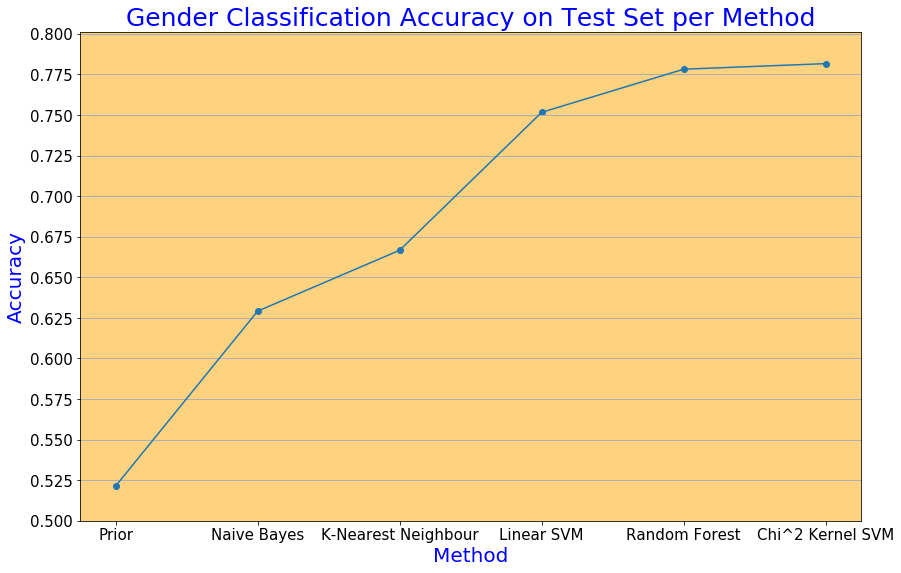

In [82]:
methods = ['Prior','Naive Bayes','K-Nearest Neighbour','Linear SVM','Random Forest','Chi^2 Kernel SVM']
accuracy_values = [accuracy_val_prior,accuracy_val_gnb,
                  accuracy_val_knn,accuracy_val_clf,accuracy_val_rf,
                  accuracy_val_chi]

plt.figure(figsize=(14,9))
ax = plt.gca()
ax.scatter(x = methods , y = accuracy_values)
ax.plot(methods,accuracy_values)
ax.set_xlabel('Method',fontsize =20,color='blue')
ax.set_ylabel('Accuracy',fontsize =20,color='blue')
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
ax.set_facecolor('#ffd27f')
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.yticks(np.arange(0.5, 0.8, 0.025))
ax.set_title('Gender Classification Accuracy on Test Set per Method',fontsize =25,color='blue')
plt.show()

## Results F-Score

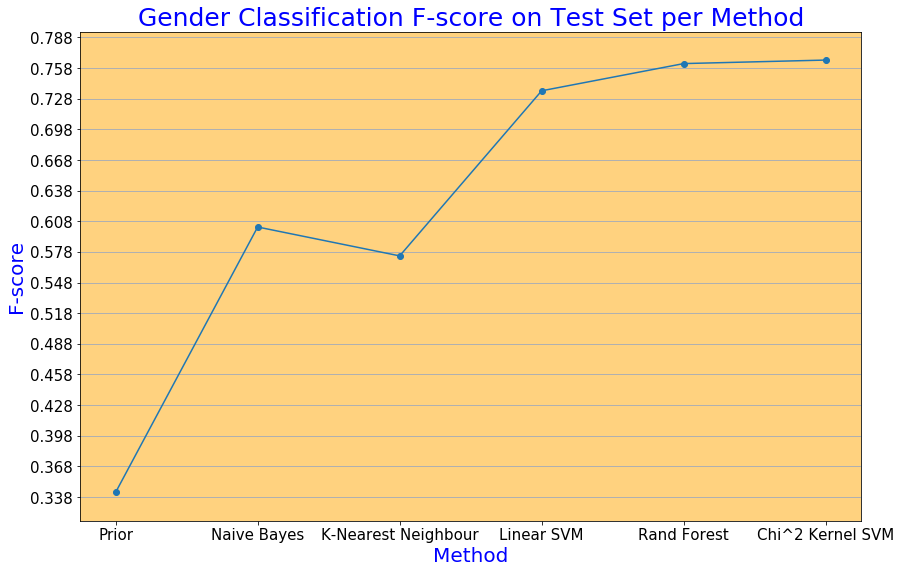

In [81]:
methods = ['Prior','Naive Bayes','K-Nearest Neighbour', 'Linear SVM','Rand Forest','Chi^2 Kernel SVM']
accuracy_values = [f1_score_score_val_prior,f1_score_score_val_gnb,
                  f1_score_score_val_knn,f1_score_score_val_clf,f1_score_score_val_rf,
                  f1_score_score_val_chi]

plt.figure(figsize=(14,9))
ax = plt.gca()
ax.scatter(x = methods , y = accuracy_values)
ax.plot(methods,accuracy_values)
ax.set_xlabel('Method',fontsize =20,color='blue')
ax.set_ylabel('F-score',fontsize =20,color='blue')
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
ax.set_facecolor('#ffd27f')
plt.grid(linestyle='-', linewidth=1,axis='y')
plt.yticks(np.arange(0.338, 0.8, 0.03))
ax.set_title('Gender Classification F-score on Test Set per Method',fontsize =25,color='blue')
plt.show()